# Wave Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

The **wave equation** is given by

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2} \ , \ \ 0 \leq x \leq L \ , \ \ t \geq 0 \ , \ \ c \in \mathbb{R}
$$

## Initial and Boundary Conditions

The wave equation is second order with respect to time $t$ therefore we need two initial conditions to specifiy a unique solution. The **initial conditions** are functions $f(x)$ and $g(x)$ which determine the solution and derivative at time $t=0$:

$$
u(x,0) = f(x) \ \ \ \text{and} \ \ \ u_t(x,0) = g(x)
$$

**Dirichlet boundary conditions** specify the values of the solution at the endpoints:

$$
u(0,t) = A_0 \ \ \ \text{and} \ \ \ u(L,t) = A_L
$$

**Neumann boundary conditions** specify the values of the derivative of the solution at the endpoints:

$$
u_x(0,t) = Q_0 \ \ \ \text{and} \ \ \ u_x(L,t) = Q_L
$$

When one endpoint is a Dirichlet boundary condition and the other is a Neumann boundary condition then we call them **mixed boundary conditions**. For example:

$$
u(0,t) = A_0 \ \ \ \text{and} \ \ \ u_x(L,t) = Q_L
$$


## Discretization

Choose the number of steps $N$ in the $x$ direction and the number of steps $K$ in the $t$ direction. These choices determine the step sizes $\Delta x$ and $\Delta t$, and create a grid of points:

$$
\begin{align}
x_n &= n \Delta x \ , \ \ n = 0,1, \dots, N \ , \ \ \Delta x = \frac{L}{N} \\
t_k &= k \Delta t \ , \ \ k = 0,1, \dots, K \ , \ \ \Delta t = \frac{t_f}{K}
\end{align}
$$

Here we have chosen some final time value $t_f$ so that the domain of the solution $u(x,t)$ is a finite rectangle $[0,L] \times [0,t_f]$. The goal of a finite difference method is to compute the matrix

$$
U = [u_{n,k}]
$$

which gives approximations of the solution $u(x,t)$ at the grid points:

$$
u_{n,k} \approx u(x_n,t_k) = u(n \Delta x,k \Delta t)
$$

where $x_0 = 0$, $x_N = L$, $t_0 = 0$ and $t_K = t_f$.

## Central Time Central Space

Apply the central difference formula for $u_{tt}$ at position $x_n$ and time $t_k$

$$
\begin{align*}
u_{tt}(x_n,t_k) &= \frac{u(x_n,t_{k+1}) - 2 u(x_n,t_k) + u(x_n,t_{k-1})}{(\Delta t)^2} + O((\Delta t)^2) \\
&= \frac{u_{n,k+1} - 2 u_{n,k} + u_{n,k-1}}{(\Delta t)^2} + O((\Delta t)^2)
\end{align*}
$$

Apply the central difference formula for $u_{xx}$ at position $x_n$ and time $t_k$

$$
\begin{align*}
u_{xx}(x_n,t_k) &= \frac{u(x_{n+1},t_k) - 2u(x_n,t_k) + u(x_{n-1},t_k)}{(\Delta x)^2} + O \left( (\Delta x)^2 \right) \\
&= \frac{u_{n+1,k} - 2u_{n,k} + u_{n-1,k}}{(\Delta x)^2} + O \left( (\Delta x)^2 \right)
\end{align*}
$$

Plug the formulas into the wave equation at position $x_n$ and time $t_k$

$$
\begin{align*}
u_{tt}(x_n,t_k) &= c^2 u_{xx}(x_n,t_k) \\
\frac{u_{n,k+1} - 2 u_{n,k} + u_{n,k-1}}{(\Delta t)^2}
&=
c^2 \left( \frac{u_{n+1,k} - 2u_{n,k} + u_{n-1,k}}{(\Delta x)^2} \right)
\end{align*}
$$

Rearrange to solve for $u_{n,k+1}$

$$
u_{n,k+1} = r^2 u_{n-1,k} + 2(1 - r^2) u_{n,k} + r^2 u_{n+1,k} - u_{n,k-1} \ \ , \ \ r = \frac{c \Delta t}{\Delta x}
$$

This is the **central-time-central-space (CTCS)** finite difference method for the wave equation.

## CTCS with Dirichlet BCs

### Matrix Equations

Consider Dirichlet boundary conditions $u(0,t) = A_0$ and $u(L,t) = A_L$. Write out the CTCS equations:

$$
\begin{array}{cccccccccccccccc}
u_{0,k+1} & = & 2u_{0,k} & & & & & & & & & & & - & u_{0,k-1} \\
u_{1,k+1} & = & r^2 u_{0,k} & + & 2(1 - r^2) u_{1,k} & + & r^2 u_{2,k} & & & & & & & - & u_{1,k-1} \\
u_{2,k+1} & = & & & r^2 u_{1,k} & + & 2(1 - r^2) u_{2,k}  & +  & r^2 u_{3,k} & & & & & - & u_{2,k-1} \\
 & \vdots &  & & & & & \ddots &  & & & & & \vdots & \\
u_{N-2,k+1} & = & & & & & r^2 u_{N-3,k}  & + & 2(1 - r^2) u_{N-2,k}  & + & r^2 u_{N-1,k} & & & - & u_{N-2,k-1} \\
u_{N-1,k+1} & = & & & & & & & r^2 u_{N-2,k}  & +  & 2(1 - r^2) u_{N-1,k}  & + & r^2 u_{N,k} & - & u_{N-1,k-1} \\
u_{N,k+1} & = & & & & & & & & & & & 2u_{N,k} & - & u_{N,k-1}
\end{array}
$$

Note that we are writing the boundary conditions in a particular way:

$$
u_{0,k+1} = 2u_{0,k} - u_{0,k-1}
$$

$$
u_{N,k+1} = 2u_{N,k} - u_{N,k-1}
$$

so that the full vector of values at time index $k-1$ appear in the last column.

These finite difference equations show us that approximations at time $t_{k+1}$ are given by matrix multiplication of the vector of approximations at time $t_k$ along with the vector at time $t_{k-1}$. Therefore we can write the CTCS method as an iterative matrix formula

$$
\boldsymbol{u}_{k+1} = A \boldsymbol{u}_k - \boldsymbol{u}_{k-1}
$$

where

$$
A = 
\left[
\begin{array}{ccccccc}
2 & & & & & \\
r^2 & 2(1 - r^2) & r^2 & & & & \\
& r^2 & 2(1 - r^2) & r^2 & & & \\
& & & \ddots & & & \\
& & & r^2 & 2(1 - r^2) & r^2 & \\
& & & & r^2 & 2(1 - r^2) & r^2 \\
& & & & & & 2
\end{array}
\right]
$$

$$
\boldsymbol{u}_k = \begin{bmatrix} u_{0,k} \\ u_{1,k} \\ \vdots \\ u_{N-1,k} \\ u_{N,k} \end{bmatrix}
\hspace{20mm}
r = \frac{c \Delta t}{\Delta x}
$$

The finite difference formula at $k=0$ yields

$$
u_{n,1} = r^2 u_{n-1,0} + 2(1 - r^2) u_{n,0} + r^2 u_{n+1,0} - u_{n,-1}
$$

with the "ghost value" $u_{n,-1}$. Use the initial condition $u_t(x,0) = g(x)$ with the central difference formula

$$
\frac{u_{n,1} - u_{n,-1}}{2 \Delta t} = g(x_n)
$$

Rearrange for $u_{n,-1}$

$$
u_{n,-1} = u_{n,1} - 2 (\Delta t) g(x_n)
$$

Substitute into the formula at $k=0$

$$
u_{n,1} = r^2 u_{n-1,0} + 2(1 - r^2) u_{n,0} + r^2 u_{n+1,0} - u_{n,1} + 2 (\Delta t) g(x_n)
$$

and rearrange to get

$$
u_{n,1} = \frac{1}{2} \left( r^2 u_{n-1,0} + 2(1 - r^2) u_{n,0} + r^2 u_{n+1,0} \right) + (\Delta t) g(x_n)
$$

Write as a matrix equation

$$
\boldsymbol{u}_1 = \frac{1}{2} A \boldsymbol{u}_0 + \Delta t g(\boldsymbol{x})
$$

Here we are assuming $g(0)=g(L)=0$.

### Implementation

The function `waveCTCSD` takes input parameters `c`, `L`, `f`, `g`, `A0`, `AL`, `tf`, `N` and `K`, and returns the matrix `U` of approximations where:

* `c` is the diffusion coefficient in the wavve equation $u_{tt} = c^2 u_{xx}$
* `L` is the length of the interval $0 \leq x \leq L$
* `f` is a Python function whcih represents the initial condition $u(x,0) = f(x)$
* `g` is a Python function whcih represents the initial condition $u_t(x,0) = g(x)$
* `A0` is the boundary condition $u(0,t) = A_0$
* `AL` is the boundary condition $u(L,t) = A_L$
* `tf` is the length of the interval $0 \leq t \leq t_f$
* `N` is the number of steps in the $x$-direction of the discretization
* `K` is the number of steps in the $t$-direction of the discretization
* `U` is the matrix $U = [u_{n,k}]$ of size $(N+1) \times (K+1)$ of approximations $u_{n,k} \approx u(x_n,t_k)$

In [21]:
def waveCTCSD(c,L,f,g,A0,AL,tf,N,K):
    dx = L/N
    dt = tf/K
    r = c*dt/dx
    x = np.linspace(0,L,N+1)
    U = np.zeros((N+1,K+1))
    U[:,0] = f(x)
    U[0,:] = A0
    U[N,:] = AL
    A = np.zeros((N+1,N+1))
    A[0,0] = 2.
    A[N,N] = 2.
    for n in range(1,N):
        A[n,n-1] = r**2
        A[n,n] = 2*(1 - r**2)
        A[n,n+1] = r**2
    G = g(x)
    G[0] = 0.
    G[N] = 0.
    U[:,1] = 1/2*A@U[:,0] + dt*G
    for k in range(1,K):
        U[:,k+1] = A@U[:,k] - U[:,k-1]
    return U

### Example with Animation

Consider the equation $u_{tt} = 0.25 u_{xx}$ for $L=1$ with initial conditions $u(x,0) = 1 - \cos(2 \pi x)$, $u_t(x,0) = 0$ and dirichlet boundary conditions $u(0,t) = u(L,t) = 0$.

In [22]:
c = 0.5
L = 1
f = lambda x: 1 - np.cos(2*np.pi*x)
g = lambda x: np.zeros_like(x)
A0 = 0
AL = 0
tf = 5
N = 50
K = 5000

U = waveCTCSD(c,L,f,g,A0,AL,tf,N,K)

Visualize the result as a heat map:

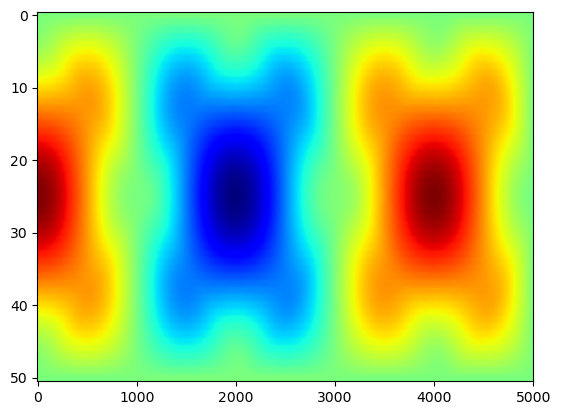

In [23]:
plt.imshow(U,aspect='auto',cmap='jet')
plt.show()

Animiate the result:

In [24]:
nframes = 100
tstep = K//nframes
x = np.linspace(0,L,N+1)

fig,ax = plt.subplots()
line, = plt.plot([],[])
ax.set_xlim(-0.1,L+0.1)
ax.set_ylim(-2.2,2.2)
ax.grid(True)
update = lambda k: line.set_data(x,U[:,k*tstep])

ani = FuncAnimation(fig,update,frames=nframes,interval=1000*tf/nframes)
plt.close()

HTML(ani.to_html5_video())

## CTCS with Neumann BCs

### Matrix Equations

Consider Neumann boundary conditions $u_x(0,t) = Q_0$ and $u_x(L,t) = Q_L$. The CTCS finite difference equation at $n=0$ yields

$$
u_{0,k+1} = r^2 u_{-1,k} + 2(1 - r^2) u_{0,k} + r^2 u_{1,k} - u_{0,k-1}
$$

with the "ghost value" $u_{-1,k}$. Use the central difference formula for $u_x(0,t_k) = Q_0$

$$
Q_0 = \frac{u_{1,k} - u_{-1,k}}{2 \Delta x}
$$

Rearrange for $u_{-1,k}$

$$
u_{-1,k} = u_{1,k} - 2 (\Delta x) Q_0
$$

and substitute into the CTCS equation

$$
u_{0,k+1} = 2(1 - r^2) u_{0,k} + 2r^2 u_{1,k} - u_{0,k-1} - 2 r^2 (\Delta x) Q_0
$$

Similarly, the boundary condition $u_x(L,t) = Q_L$ yields the equation

$$
u_{N,k+1} = 2r^2 u_{N-1,k} + 2(1 - r^2) u_{N,k} - u_{N,k-1} - 2 r^2 (\Delta x) Q_L
$$

$$
\begin{array}{cccccccccccccccccc}
u_{0,k+1} & = & 2(1-2r^2)u_{0,k} & + & 2r^2 u_{1,k} & & & & & & & & & - & u_{0,k-1} & - & 2r^2 (\Delta x) Q_0 \\
u_{1,k+1} & = & r^2 u_{0,k} & + & 2(1 - r^2) u_{1,k} & + & r^2 u_{2,k} & & & & & & & - & u_{1,k-1} & & \\
u_{2,k+1} & = & & & r^2 u_{1,k} & + & 2(1 - r^2) u_{2,k}  & +  & r^2 u_{3,k} & & & & & - & u_{2,k-1} & & \\
 & \vdots &  & & & & & \ddots &  & & & & & \vdots & & & \\
u_{N-2,k+1} & = & & & & & r^2 u_{N-3,k}  & + & 2(1 - r^2) u_{N-2,k}  & + & r^2 u_{N-1,k} & & & - & u_{N-2,k-1} & & \\
u_{N-1,k+1} & = & & & & & & & r^2 u_{N-2,k}  & +  & 2(1 - r^2) u_{N-1,k}  & + & r^2 u_{N,k} & - & u_{N-1,k-1} & & \\
u_{N,k+1} & = & & & & & & & & & 2r^2 u_{N-1,k}& + & 2(1-r^2)u_{N,k} & - & u_{N,k-1} & + & 2r^2(\Delta x) Q_L
\end{array}
$$

Therefore we can write the CTCS method as an iterative matrix formula

$$
\boldsymbol{u}_{k+1} = A \boldsymbol{u}_k - \boldsymbol{u}_{k-1} + \boldsymbol{q}
$$

where

$$
A = 
\left[
\begin{array}{ccccccc}
2(1 - r^2) & 2r^2 & & & & \\
r^2 & 2(1 - r^2) & r^2 & & & & \\
& r^2 & 2(1 - r^2) & r^2 & & & \\
& & & \ddots & & & \\
& & & r^2 & 2(1 - r^2) & r^2 & \\
& & & & r^2 & 2(1 - r^2) & r^2 \\
& & & & & 2r^2 & 2(1 - r^2)
\end{array}
\right]
$$

$$
\boldsymbol{u}_k = \begin{bmatrix} u_{0,k} \\ u_{1,k} \\ \vdots \\ u_{N-1,k} \\ u_{N,k} \end{bmatrix}
\hspace{20mm}
\boldsymbol{q} = \begin{bmatrix} -2r^2(\Delta x) Q_0 \\ 0 \\ \vdots \\ 0 \\ 2r^2(\Delta x)Q_L \end{bmatrix}
\hspace{20mm}
r = \frac{c \Delta t}{\Delta x}
$$

For $0<n<N$, the equation for $k=0$ is just as for Dirichlet boundary conditions

$$
u_{n,1} = \frac{1}{2} \left( r^2 u_{n-1,0} + 2(1 - r^2) u_{n,0} + r^2 u_{n+1,0} \right) + (\Delta t) g(x_n)
$$

For $n=0$ we have

$$
u_{0,1} = (1 - r^2) u_{0,0} + r^2 u_{1,0} - r^2(\Delta x)Q_0 + (\Delta t) g(x_0)
$$

and for $n=N$ we have

$$
u_{N,1} =  r^2 u_{N-1,0} + (1 - r^2) u_{N,0} + r^2(\Delta x)Q_L + (\Delta t) g(x_N)
$$

Therefore

$$
\boldsymbol{u}_1 = \frac{1}{2} A \boldsymbol{u}_0 + \frac{1}{2}\boldsymbol{q} + \Delta t g(\boldsymbol{x})
$$

### Implementation

The function `waveCTCSN` takes input parameters `c`, `L`, `f`, `g`, `Q0`, `QL`, `tf`, `N` and `K`, and returns the matrix `U` of approximations where:

* `c` is the diffusion coefficient in the wave equation $u_{tt} = c^2 u_{xx}$
* `L` is the length of the interval $0 \leq x \leq L$
* `f` is a Python function whcih represents the initial condition $u(x,0) = f(x)$
* `g` is a Python function whcih represents the initial condition $u_t(x,0) = g(x)$
* `Q0` is the boundary condition $u_x(0,t) = Q_0$
* `QL` is the boundary condition $u_x(L,t) = Q_L$
* `tf` is the length of the interval $0 \leq t \leq t_f$
* `N` is the number of steps in the $x$-direction of the discretization
* `K` is the number of steps in the $t$-direction of the discretization
* `U` is the matrix $U = [u_{n,k}]$ of size $(N+1) \times (K+1)$ of approximations $u_{n,k} \approx u(x_n,t_k)$

In [14]:
def waveCTCSN(c,L,f,g,A0,AL,tf,N,K):
    dx = L/N
    dt = tf/K
    r = c*dt/dx
    x = np.linspace(0,L,N+1)
    U = np.zeros((N+1,K+1))
    U[:,0] = f(x)
    A = np.zeros((N+1,N+1))
    A[0,0] = 2*(1 - r**2)
    A[0,1] = 2*r**2
    A[N,N] = 2*(1 - r**2)
    A[N,N-1] = 2*r**2
    for n in range(1,N):
        A[n,n-1] = r**2
        A[n,n] = 2*(1 - r**2)
        A[n,n+1] = r**2
    q = np.zeros(N+1)
    q[0] = -2*r**2*dx*Q0
    q[N] = 2*r**2*dx*QL
    U[:,1] = 1/2*A@U[:,0] + 1/2*q + dx*g(x)
    for k in range(1,K):
        U[:,k+1] = A@U[:,k] - U[:,k-1] + q
    return U

In [15]:
c = 0.5
L = 1
f = lambda x: 1 - np.cos(2*np.pi*x)
g = lambda x: 0
Q0 = 0
QL = 0
tf = 5
N = 50
K = 5000

U = waveCTCSN(c,L,f,g,Q0,QL,tf,N,K)

In [16]:
nframes = 100
tstep = K//nframes
x = np.linspace(0,L,N+1)

fig,ax = plt.subplots()
line, = plt.plot([],[])
ax.set_xlim(-0.1,L+0.1)
ax.set_ylim(-0.2,2.2)
ax.grid(True)
update = lambda k: line.set_data(x,U[:,k*tstep])

ani = FuncAnimation(fig,update,frames=nframes,interval=1000*tf/nframes)
plt.close()

HTML(ani.to_html5_video())

## CTCS with Mixed BCs

Combine both functions `waveCTCSD` and `waveCTCSN` into a single function `wave` which takes input parameters `c`, `L`, `f`, `g`, `BCtype0`, `BC0`, `BCtypeL`, `BCL`, `tf`, `N` and `K`, and returns the matrix `U` of approximations where:

* `c` is the coefficient in the wave equation $u_{tt} = c^2 u_{xx}$
* `L` is the length of the interval $0 \leq x \leq L$
* `f` is a Python function which represents the initial condition $u(x,0) = f(x)$
* `g` is a Python function which represents the initial condition $u_t(x,0) = g(x)$
* `BCtype0` is the type of boundary condition at $x=0$ (`'D'` for Dirichlet or `'N'` for Neumann)
* `BC0` is the value of the boundary condition at $x=0$
* `BCtypeL` is the type of boundary condition at $x=L$ (`'D'` for Dirichlet or `'N'` for Neumann)
* `BCL` is the value of the boundary condition at $x=L$
* `tf` is the length of the interval $0 \leq t \leq t_f$
* `N` is the number of steps in the $x$-direction of the discretization
* `K` is the number of steps in the $t$-direction of the discretization
* `U` is the matrix $U = [u_{n,k}]$ of size $(N+1) \times (K+1)$ of approximations $u_{n,k} \approx u(x_n,t_k)$

In [9]:
def wave(c,L,f,g,BCtype0,BC0,BCtypeL,BCL,tf,N,K):
    dx = L/N
    dt = tf/K
    r = c*dt/dx
    x = np.linspace(0,L,N+1)
    U = np.zeros((N+1,K+1))
    U[:,0] = f(x)
    A = np.zeros((N+1,N+1))
    q = np.zeros(N+1)
    G = g(x)

    if (BCtype0 not in ['D','N']) or (BCtypeL not in ['D','N']):
        raise Exception("Expecting boundary conditions of type 'D' or 'N'.")
    if BCtype0 == 'D':
        U[0,0] = BC0
        A[0,0] = 2.
        G[0] = 0.
    if BCtype0 == 'N':
        A[0,0] = 2*(1 - r**2)
        A[0,1] = 2*r**2
        q[0] = -2*r**2*dx*BC0
    if BCtypeL == 'D':
        U[N,0] = BCL
        A[N,N] = 2.
        G[N] = 0.
    if BCtypeL == 'N':
        A[N,N] = 2*(1 - r**2)
        A[N,N-1] = 2*r**2
        q[N] = 2*r**2*dx*BCL
    
    for n in range(1,N):
        A[n,n-1] = r**2
        A[n,n] = 2*(1 - r**2)
        A[n,n+1] = r**2

    U[:,1] = 1/2*A@U[:,0] + 1/2*q + dx*G
    for k in range(1,K):
        U[:,k+1] = A@U[:,k] - U[:,k-1] + q
    
    return U

In [11]:
c = 0.5
L = 1
f = lambda x: 1 - np.cos(2*np.pi*x)
g = lambda x: np.zeros_like(x)
A0 = 0
AL = 0
tf = 5
N = 50
K = 5000

U = wave(c,L,f,g,'D',A0,'D',AL,tf,N,K)

nframes = 100
tstep = K//nframes
x = np.linspace(0,L,N+1)

fig,ax = plt.subplots()
line, = plt.plot([],[])
ax.set_xlim(-0.1,L+0.1)
ax.set_ylim(-2.2,2.2)
ax.grid(True)
update = lambda k: line.set_data(x,U[:,k*tstep])

ani = FuncAnimation(fig,update,frames=nframes,interval=1000*tf/nframes)
plt.close()

HTML(ani.to_html5_video())

In [8]:
c = 0.5
L = 1
f = lambda x: 1 - np.cos(2*np.pi*x)
g = lambda x: 0
Q0 = 0
QL = 0
tf = 5
N = 50
K = 5000

U = wave(c,L,f,g,'N',Q0,'N',QL,tf,N,K)

nframes = 100
tstep = K//nframes
x = np.linspace(0,L,N+1)

fig,ax = plt.subplots()
line, = plt.plot([],[])
ax.set_xlim(-0.1,L+0.1)
ax.set_ylim(-0.2,2.2)
ax.grid(True)
update = lambda k: line.set_data(x,U[:,k*tstep])

ani = FuncAnimation(fig,update,frames=nframes,interval=1000*tf/nframes)
plt.close()

HTML(ani.to_html5_video())

In [16]:
c = 0.5
L = 1
f = lambda x: 1 - np.cos(2*np.pi*x)
g = lambda x: np.zeros_like(x)
A0 = 0
QL = 0
tf = 10
N = 50
K = 5000

U = wave(c,L,f,g,'D',A0,'N',QL,tf,N,K)

nframes = 200
tstep = K//nframes
x = np.linspace(0,L,N+1)

fig,ax = plt.subplots()
line, = plt.plot([],[])
ax.set_xlim(-0.1,L+0.1)
ax.set_ylim(-2.2,2.2)
ax.grid(True)
update = lambda k: line.set_data(x,U[:,k*tstep])

ani = FuncAnimation(fig,update,frames=nframes,interval=1000*tf/nframes)
plt.close()

HTML(ani.to_html5_video())